<font size=7><b> Introduction to Electrophysiology

This notebook will teach you the basics of analyzing [electrophysiology](https://en.wikipedia.org/wiki/Electrophysiology) data. In this homework we will perform some analysis on the data that Prof. Tal Sharf presented on Wednesday (April, 17). Prof. Sharf's experiment was done to determine the affects of a drug called [diazepam](https://en.wikipedia.org/wiki/Diazepam), on [cerebral organoids](https://en.wikipedia.org/wiki/Cerebral_organoid#:~:text=A%20cerebral%20organoid%2C%20or%20brain,over%20a%20course%20of%20months.). 



<font color="red"><b>Note:</b> This homework will be due April 18th at 11:59pm PT.  Make sure to complete the exercises at the bottom of this notebook.

[  7 118  48 ...  62  30 117]
179.8797
31756
<class 'numpy.ndarray'>
131


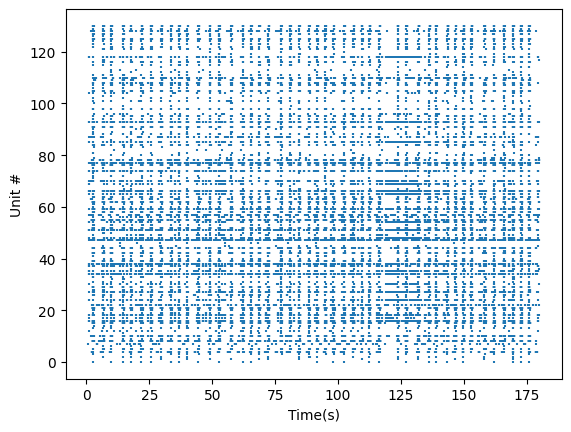

179880


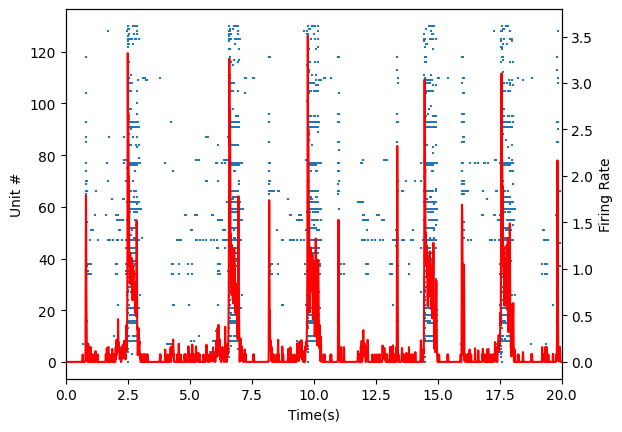

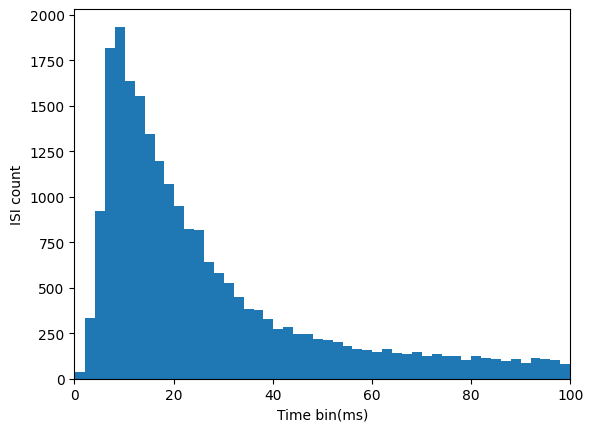

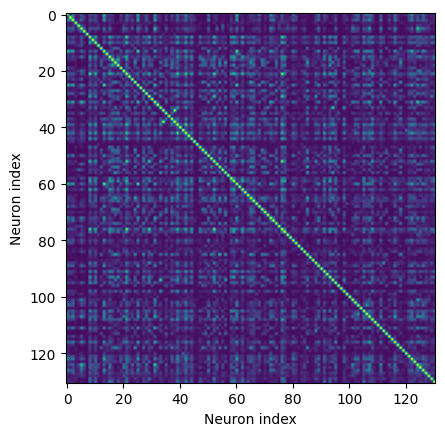

In [1]:
%run "electrophysiology_source_code.ipynb"

# <font color="gray"> Reading Material

<font color="red"> Required Reading:
* [Professor Sharf's paper on Neural Circuitry](reading_material/Tal_Neural_Circuitry.pdf)
* [Spike Time Tiling Introduction](./reading_material/Spike_Time_Tiling.pdf)

Briskly read through [Professor Sharf's paper](reading_material/Tal_Neural_Circuitry.pdf). Some of the exercises require you to read the first few pages. [This paper's](./reading_material/Spike_Time_Tiling.pdf) discussion on Spike Time Tilling is also required reading. [braingeneerspy](https://github.com/braingeneers/braingeneerspy) is the name of the python package used by the Haussler lab for data analsyis. We will be using the [analysis toolkit](https://github.com/braingeneers/braingeneerspy/tree/master/src/braingeneers/analysis) from that package..

**Other Material**
* Wiki Articles:
    * Basic wiki articles on [electrophysiology](https://en.wikipedia.org/wiki/Electrophysiology) , [diazepam](https://en.wikipedia.org/wiki/Diazepam) , [cerebral organoids](https://en.wikipedia.org/wiki/Cerebral_organoid#:~:text=A%20cerebral%20organoid%2C%20or%20brain,over%20a%20course%20of%20months.), [action potential](https://en.wikipedia.org/wiki/Action_potential)
    * Scholarpedia article on [Spike train analysis](http://www.scholarpedia.org/article/Measures_of_spike_train_synchrony)
* Research Papers
    * Review paper on [cerebral organoids](./reading_material/rise_of_organoids.pdf)
    * Professor  [Sharf's paper](reading_material/Tal_Neural_Circuitry.pdf)
    * [Spike Time Tilling](./reading_material/Spike_Time_Tiling.pdf) paper



#  Spike Trains

## Spike Train

A "spike train" (or "spike raster") is an incredibly powerful tool used to analyze neural data. In this notebook you will learn to do some basic analysis on spike train data. A spike train is a 2D matrix where each row represents a neuron, and each column is a single moment in time. Each blue dot in the matrix is a moment in time where a neuron emits a signal to other neurons. This signal can be called a "spike", a "fire", or, more scientifically, an "action potential".


When you look at a spike train, you see every single moment at which a neuron "fires". [This link](http://www.scholarpedia.org/article/Measures_of_spike_train_synchrony) is a great resource if you want to take a deeper dive into spike train analysis. Below is the complete spike raster for the control dataset from the the experiment, `Spike_Raster_Control.mat`.

[  7 118  48 ...  62  30 117]
179.8797
31756
<class 'numpy.ndarray'>
131


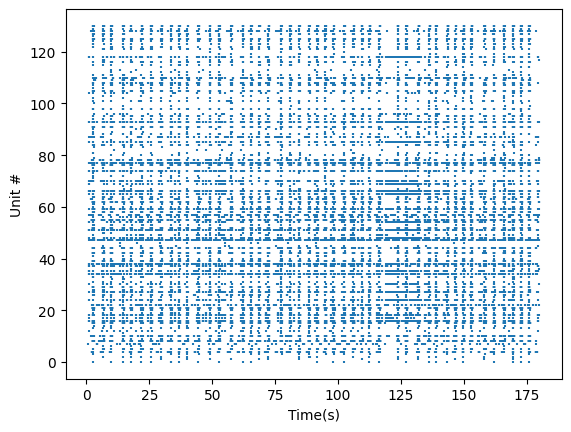

In [2]:
plot_raster(data_control)

## Analysing the Train

When scientists analyze spike trains, they are especially interested in looking at the "neural bursts" that occur. A burst is defined a short window of activity where the neurons are especially active. Looking at the spike raster above you might be able to pick out the neural bursts (the "veritcal lines"), however, bursts are easier to distinguish when you zoom in on the dataset.  

179880


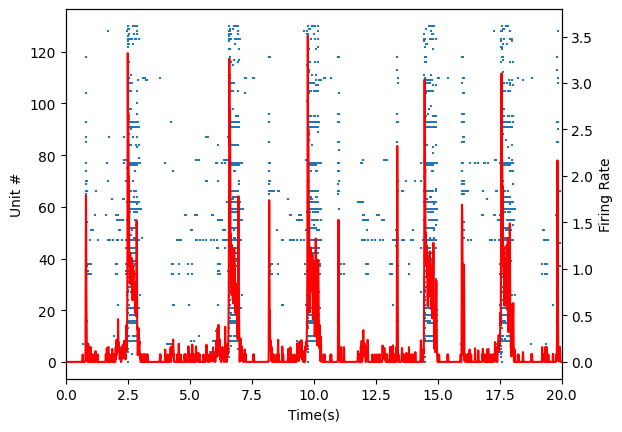

In [3]:
raster_analysis(data_control)

In the example above we have zoomed in on the first 20 seconds of the spike raster shown above. This raster also contains a red line that show the relative activity of neurons at that timestep. Looking at this 20 second window, I see **5** bursts. Defining a burst can be a little tricky. Notice that there are also areas of small activity in between bursts. Below I highlight where I see bursts and areas of activity in the spike raster.

![alt text](.images/burst_analysis.png "Title")

Neuroscientists are interested in bursts not just because they are the areas of most activity, but most importantly, because these regions display repeated patterns of consistent relationships between neurons. Below we zoom in even more on to the first two bursts of the spike raster (8 second window). Notice that the neural activity pattern (red line) looks similar for both bursts. Also, if you look at individual neurons (blue dots) you'll see that they follow similar firing patterns within both bursts.

179880


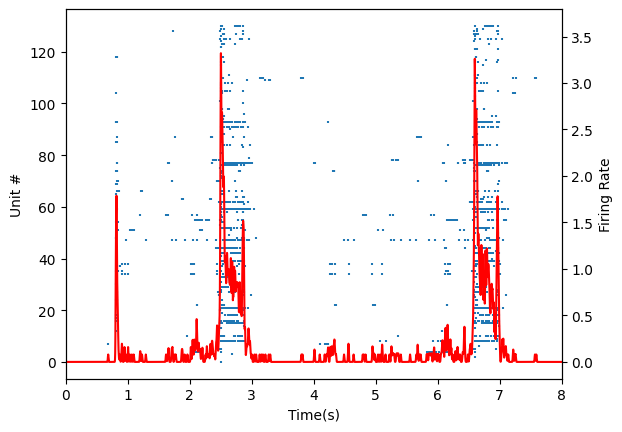

In [4]:
raster_analysis(data_control, seconds=8)

# Neural Relationships

To build the type of beautiful circuit diagrams that were discussed in class, scientists must work backwards by analyzing the firing patterns they see from neurons in the brain. They use different tools to parse out the relationship between neurons.

## Interspike Intervals

Before we attempt to answer the complicated question of "what is the relationship patterns between different neurons?", lets start with a much simpler question: "what is the relationship pattern between a single neuron and itself?". In other words, what properties can we say about the firing pattern of a single neuron?

This is a more complicated question than it might at first seem. Neurons follow a somewhat random behaviour, it is not always certain when, or how often, a neuron will fire. Lets take a "data first" approach to gain a better understanding of when neurons fire. We are going to consider the interval of time that passes in between each moment a neurons fires, this is called the interspike interval. Here is a [brief summary](https://www.tau.ac.il/~tsirel/dump/Static/knowino.org/wiki/Interspike_interval.html#:~:text=The%20interspike%20interval%20is%20the,messengers%20to%20affect%20other%20neurons.) of interspike intervals. Below we see a histogram of the interspike interval for all the neurons in our spike raster from above. What probability distribution does the graph below look like?

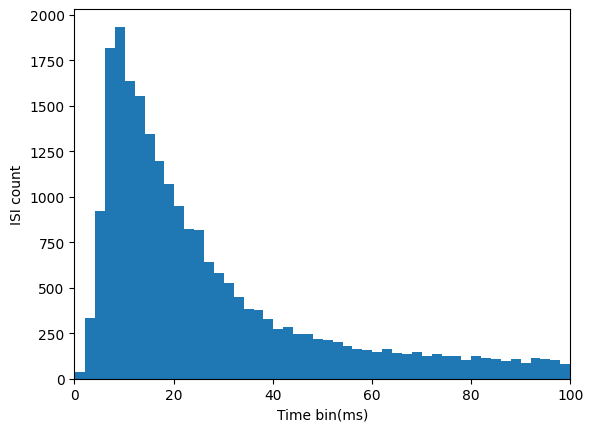

In [5]:
interspike(data_control)

<p>&nbsp</p>

<center><b>Example of Interspike Intervals</b></center>

![alt text](https://www.tau.ac.il/~tsirel/dump/Static/knowino.org/w/images/thumb/3/38/Spiketimes.png/300px-Spiketimes.png)

The mathematicians in the group will be delighted to know that intervals between spikes for a neuron tend to follow a [poission distribution](https://en.wikipedia.org/wiki/Poisson_distribution). This is not a coincidence, read the wiki article to understand why. Many of the beautiful (and complicated) statistical models used to describe the circuit patterns between neurons use the poission distribution as the fundemental building block of more complicated algorithms.

## Correlation Matrix

We have just shown that we can consider each neuron to act as a random variable, with a poission probability of firing at any given time. Given that we are now working with random variables, it is natural to use a correlation matrix to measure the relative strength in relationship between neurons. A correlation matrix displays the correlation between every pair of neurons in our spike raster. 

Below is a correlation matrix created from the spike raster above. Postively correlated neurons show up as a green dot in the plot, where negatively correlated neurons are deep blue. One could imageine strongly correlated neurons as being part of the same cicuit, or even touching. Where negatively correlated neurons may perhaps display some inhibitory cell stopping other neurons from firing. The true interpretation of a correlation matrix is much more vague than this. In reality, more nuanced techniques are used to tease apart cell circuitry. However, as the homework will show, the correlation matrix is still useful for discerning changes in neural behaviour.

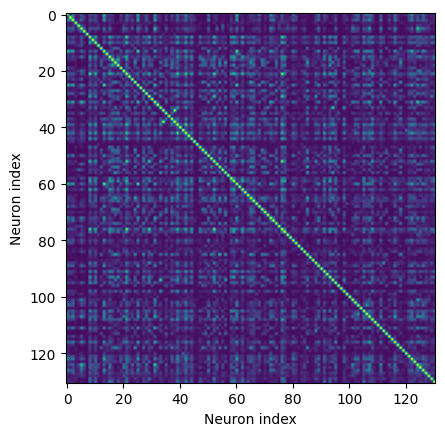

In [6]:
correlation(data_control)       

<p>&nbsp</p>
<center><b>Summary of Correlation</b></center>

![alt text](https://www.mathsisfun.com/data/images/correlation-examples.svg)

# <font color="red">Exercises

The exercises below will provide you with a better understanding of how neural data is analyzed. Note, when completing these exercises, please remember to show your work. If you typed any code to find a solution, please write down your code.

## Prof. Sharf's Paper (5 Points Total)

Read through the first few pages of [Professor Sharf's paper](reading_material/Tal_Neural_Circuitry.pdf). Then answer the following questions.

### Breakthrough Device (3 Points)

What newly developed device has enabled high-resolution readouts of neural activity? What is the name of the specific device (model/maker) used in this paper? How many electrodes can it record from simultaneously?

<font color="green"><b>Answer

The device that has enabled high-resolution readouts of neural activity is the complementary metal-oxide-semiconductor (CMOS)-based microelectrode array (MEA). CMOS MEI devices were used in this study to analyze organoids, which can record 1024 electrodes simultaneously (from the 26,400 routable electrodes total). 

### Organoid Models (2 Points)

How long was neural activity recorded for after the cerebral organoid was placed on the recording device? What is the name of 2 drugs that were used to change the neural activity of organoids in the experiment?

<font color="green"><b>Answer

Neural activity was recorded on the organoid slice placed on the device for up to 6 months, of which spontaneous spiking occurred within two weeks. The name of the two drugs used to change the neural activity of organoids are: Benzodiazepine and gabazine.

## Curating Raw Data (2 Points Total)

When a neuron emits a signal to other cells, it can be called a "spike", a "fire", or, more scientifically, an "action potential". The spike raster that you saw in the lecture above is the final product from considerable work done on the "raw data" recorded from electrodes. A microscopic 2D grid of electrodes calledn an [MEA](https://ars.els-cdn.com/content/image/1-s2.0-S0165027099001132-gr1.jpg) records an "action potential" across multiple locations of the neuron's body. This [wiki article](https://en.wikipedia.org/wiki/Action_potential), gives a good example of what an action potential looks like. A major step in the process of finding neurons from raw data, involves looking at "footprints" of action potentials from prospective neurons. These "footprints" are representative 2D depictions of raw data coming from electrods on the MEA. The **4** images below are footprints of prospective neurons.



For the **4** images below, classify them as either being an "action potential" or as being "noise". When determinning if a "neural footprint" is a spike or noise, consider the following-  The "spike" should be seen across multiple electrodes, furthermore, the neuron should remain consistent across multiple electrodes. There shouldn't be any significant changes in it's appearance.

<font color="orange"><b>Hint:</b> **2** of the images below are action potentials, and the other **2** are noise.

<font color="green"><b>Answer

<b>Image 1:</b> Action potential

<b>Image 2:</b> Noise

<b>Image 3:</b> Action potential

<b>Image 4:</b> Noise

<b><center>Image 1</center></b>
![alt text](.images/spike1.png "Title")

<b><center>Image 2</center></b>
![alt text](.images/spike2.png "Title")

<b><center>Image 3</center></b>
![alt text](.images/spike3.png "Title")

<b><center>Image 4</center></b>
![alt text](.images/spike4.png "Title")

## Analyzing Control Dataset (5 Points Total)

In this section we will calculate some summary statistics on the control dataset, `data_control`. `data_control` is a `SpikeData` object created using the [analysis package](https://github.com/braingeneers/braingeneerspy/blob/master/src/braingeneers/analysis/analysis.py) from the braingeneerspy python library.

### Basic Summary (3 Points)

Lets start my getting a basic summary of the spike raster, `data_control`. How many neurons are there in the recording? How long is the recording (in seconds)? In total, how many spikes occured across all neurons?

<font color="orange">**Hint:** While this question may at first appear oubvious, getting the answer with code may be harder than you expect. This is because `data_control` is coded as a sparse matrix to save on memory. One way of going about this answer is by looking at the variable `length` and some of the code inside of the `rates` function. Another approach is to use the function `raster` with bin size of 1.


<font color="green"><b>Answer

In [7]:
import numpy as np

def basic_summary(sd):
    idces, times = sd.idces_times()
    #print(idces)

    print('The total length of recording:',max(times/1000),'seconds') #total length of recording 
    print('The total number of spikes is:',len(idces)) # how many spikes occurred (bc indices of sd.idces_times()) are index of each spike
    #print(type(idces))
    print('The number of neurons is:',len(np.unique(idces)),'neurons') # the unique indices (yvalues) of spikes, corresponding to neurons; length is number of neurons 

basic_summary(data_control)

The total length of recording: 179.8797 seconds
The total number of spikes is: 31756
The number of neurons is: 131 neurons


### Calculate Firing rate (1 Point)

The firing rate of a neuron is a measure of how often the cell fires. It is defined as the total number of spikes divided by total time (in seconds):

$$
\dfrac{\text{spikes}}{\text{time}}
$$

What is the average firing rate for a single neuron in the control dataset?

<font color="orange">**Note:** Here we are asking for the number of spike per second per neuron- aka: the firing rate of the entire recording divided by the number of neurons in the recording.

<font color="green"><b>Answer

In [8]:
def firing_rate(sd):
    idces, times = sd.idces_times()
    #print(idces)

    recLength = max(times/1000) #total length of recording 
    numSpikes = len(idces) # how many spikes occurred (bc indices of sd.idces_times()) are index of each spike
    neurons = len(np.unique(idces))
    #firing rate = spikes / time
    firingRate = numSpikes / neurons / recLength
    return round(firingRate,6)

fr=firing_rate(data_control)
print('The average firing rate for a single neuron in the control set is {firingRate} spikes/sec/neuron'.format(firingRate=fr))

The average firing rate for a single neuron in the control set is 1.347635 spikes/sec/neuron


### Calculate Coefficient of Variation (1 Point)

Given the interspike intervals (ISI's) of a dataset, the "Coefficient of Variation" (CV) is defined as the standard deviation of the ISI's divided by the mean.

$$
\dfrac{\text{sd}\begin{pmatrix}\text{ISI}\end{pmatrix}}{\text{mean}\begin{pmatrix}\text{ISI}\end{pmatrix}}
$$

In neuroscience the CV is commonly used as a measure of randomness in the dataset. A CV of of 1 means that the data folllows a more poission-like distribution. A smaller number for the CV tends to mean that the data is less random. Calculate the CV for the control dataset.

<font color="orange">**Hint:** Use the code inside of the `interspike` function for your ISI's, however, please make sure not to use the variable `isis_raw` when doing the CV calculation.

<font color="green"><b>Answer

In [9]:
def CVcalculation(sd):
    # Interspike-intervals of 2 select neurons
    isis_raw = sd.interspike_intervals()
    # Remove all isi's greater than 100ms. As there are likely neurons not following periodic firing pattern
    isis=[]
    for i in range(len(isis_raw)):   
        isi=isis_raw[i]
        isis = isis + isi[isi<100].tolist() 
        
    #print(isis)

    #make into np array
    isisArray = np.array(isis)
    isis_sd = np.std(isisArray) #standard deviation of isis
    isis_mean = np.mean(isisArray) #avg of isis
    CV = isis_sd / isis_mean

    return CV

cv = CVcalculation(data_control)
print('The coefficient of variation (CV) for the control data is {cv}.'.format(cv=round(cv,6)))


The coefficient of variation (CV) for the control data is 0.828894.


## Analyzing Diazepam Dataset (11.5 Points Total)

In this section we will analyze the results from the cerebral organoid after it was given the drug Diazepam. Specifically, we will be comparing these results the control data to see what affects diazepam has on the tissue.

<font color="orange">**Hint:** When answering the questions below, it's important to remember the general affect that Diazepam has on neurons. In general, diazepam **decreases neural activity**, however, firing patterns between neurons become **more organized** and less random. 

### Load Data (1 Point)

Create a variable called `data_diazepam` which loads the data from `Spike_Raster_Diazepam.mat` into a Braingeneerspy `SpikeData` object. Note, this is the same way we load the control dataset in the source code.

<font color="green"><b>Answer

In [10]:
data_diazepam = mat_to_spikeData('/home/jovyan/data/ephys/2023-08-28-e-Math_Mind_Class/HW2-Electrophysiology/Spike_Raster_Diazepam.mat')

### Basic Summary (3 Points)

For the dataset, `data_diazepam`, calculate how many neurons there are, how long the recording is (in seconds), and the total number of spikes that occured.

<font color="green"><b>Answer

In [11]:
def basic_summary(sd):
    idces, times = sd.idces_times()
    #print(idces)

    print('The total length of recording:',max(times/1000),'seconds') #total length of recording 
    print('The total number of spikes is:',len(idces)) # how many spikes occurred (bc indices of sd.idces_times()) are index of each spike
    #print(type(idces))
    print('The number of neurons is:',len(np.unique(idces)),'neurons') # the unique indices (yvalues) of spikes, corresponding to neurons; length is number of neurons 

basic_summary(data_diazepam)

The total length of recording: 179.9898 seconds
The total number of spikes is: 20971
The number of neurons is: 131 neurons


### Firing Rate (1 Point)

What is the average firing rate for a single neuron in the diazepam dataset?  How does this compare to the control dataset? Is this consistent with what we expect from Diazepam?

<font color="orange">**Note:** Like before, we are asking for the number of spike per second per neuron

<font color="green"><b>Answer

The average firing rate for a single neuron in the diazepam dataset is 116.5 spikes/second. Compared to the average firing rate in the control dataset (which was 176.5 spikes/second), the diazepam dataset's rate is much lower. This is consistent with what we expect from diazepman, because the drug overall decreases neural activity; therefore, a decreased firing rate is expected. 

In [12]:
def firing_rate(sd):
    idces, times = sd.idces_times()
    #print(idces)

    recLength = max(times/1000) #total length of recording 
    numSpikes = len(idces) # how many spikes occurred (bc indices of sd.idces_times()) are index of each spike
    neurons = len(np.unique(idces))
    
    #firing rate = spikes / time
    firingRate = numSpikes / neurons / recLength
    return round(firingRate,6)

fr=firing_rate(data_diazepam)
print('The average firing rate for a single neuron in the control set is {firingRate} spikes/sec/neuron'.format(firingRate=fr))

The average firing rate for a single neuron in the control set is 0.889406 spikes/sec/neuron


### Calculate Coefficient of Variation (1 Point)

Calculate the CV score for Diazepam dataset. Compare your result to the control dataset. Is this result consistent with the general affects we expect from Diazepam?

<font color="green"><b>Answer

Data comparison:
Compared to the control dataset, the CV of the diazepam data set is smaller (while the control dataset CV value is 0.83, the value of the diazepam dataset is 0.6). Because we know Diazepam has the effect of making a more regular or consistent firing pattern in neurons, a smaller CV--which indicates less random data--is consistent with the general effects we would expect. 

In [13]:
def CVcalculation(sd):
    # Interspike-intervals of 2 select neurons
    isis_raw = sd.interspike_intervals()
    # Remove all isi's greater than 100ms. As there are likely neurons not following periodic firing pattern
    isis=[]
    for i in range(len(isis_raw)):   
        isi=isis_raw[i]
        isis = isis + isi[isi<100].tolist() 
        
    #print(isis)

    #make into np array
    isisArray = np.array(isis)
    isis_sd = np.std(isisArray) #standard deviation of isis
    isis_mean = np.mean(isisArray) #avg of isis
    CV = isis_sd / isis_mean

    return CV

cv = CVcalculation(data_diazepam)
print('The coefficient of variation (CV) for the control data is {cv}.'.format(cv=round(cv,6)))


#This value of 0.6 is smaller than the control CV value of 0.83 (a smaller value indicates a less-random firing pattern, consistent
#what we would expect from diazepam). 


The coefficient of variation (CV) for the control data is 0.599933.


### Bursting Behaviour (4 Points)

#### Macro

Create a zoomed in plot of the spike raster for the diazepam dataset that shows the first 20 seconds of the recording. How many bursts do you see? How does this compare to the number of bursts you saw in the control dataset? Are these results consistent with figures in Tal's paper? If so, which figure?

<font color="green"><b>Answer

Data analysis: 
In the diazepam dataset, I see eight obvious bursts, which is more than the control dataset, in which the bursts are less regular (only five peaks reach levels of the bursts in the diazepam dataset). These results are consistent with figure 1d in Professor Sharf's paper, in which increased regularity of bursts were also observed in the diazepam dataset. 

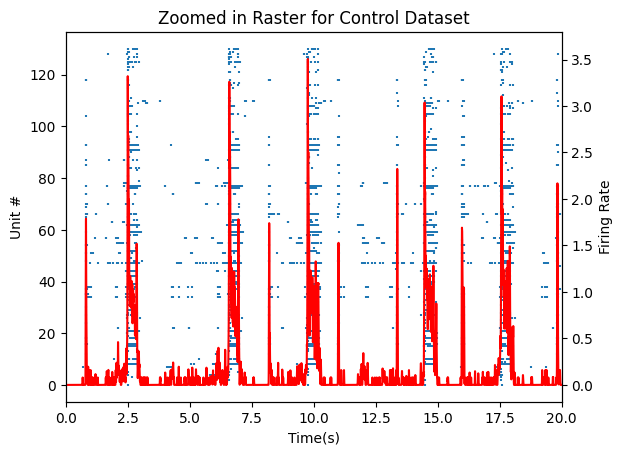

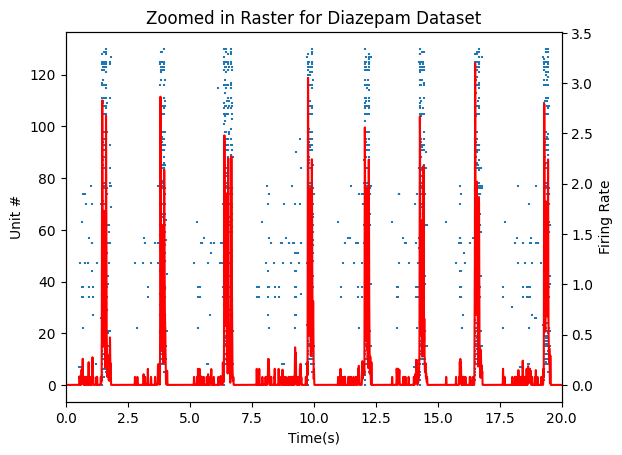

In [14]:
def raster_analysis(sd, dataset, seconds=20):
    # Zoomed Raster and pop rate
    # Get coordinates for raster
    idces, times = sd.idces_times()
    dataset = dataset 

    # Get population rate for everything
    pop_rate = sd.binned(bin_size=1)# in ms
    # Lets smooth this to make it neater
    sigma = 5
    pop_rate_smooth = gaussian_filter1d(pop_rate.astype(float),sigma=sigma) 
    t = np.linspace(0,sd.length,pop_rate.shape[0])/1000

    fig, ax = plt.subplots()

    ax.scatter(times/1000,idces,marker='|',s=1)
    ax2 = ax.twinx()
    ax2.plot(t,pop_rate_smooth,c='r')

    ax.set_xlim(0,seconds)
    ax.set_xlabel("Time(s)")
    ax.set_ylabel('Unit #')
    ax2.set_ylabel('Firing Rate')
    plt.title('Zoomed in Raster for {d} Dataset'.format(d=dataset))
    plt.show()

#plotting both datasets
raster_analysis(data_control,'Control')
raster_analysis(data_diazepam,'Diazepam')

#### Micro

Create a graph that zooms in on the first **2** bursts from the Diazepam dataset. Compare this to the first **2** bursts of the control dataset. Inside of a burst do the neural acivity patterns look different? If so how?

<font color="green"><b>Answer

Response:
Inside of a burst, the neural activity patterns do differ between the Diazepam and control datasets. The Diazepam dataset bursts each have three distinct spikes of activity, while the control dataset bursts have two distinct bursts with a region of decreasing activity in between. Additionally, across the two bursts of each dataset, the highest spike seen in the Diazepam bursts (which spike around 110 units) are both lower than those in the control dataset bursts (which spike closer to 120). 

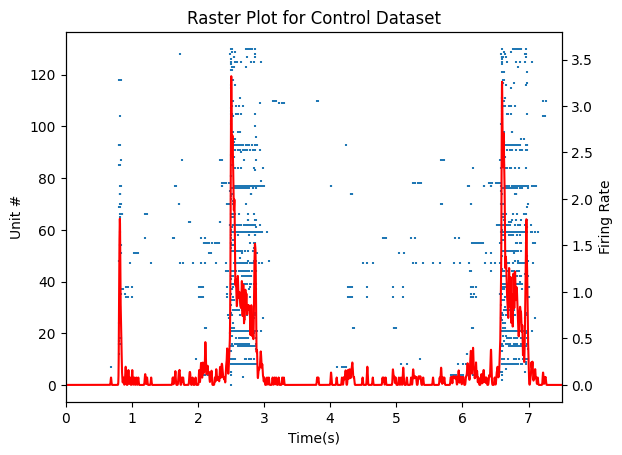

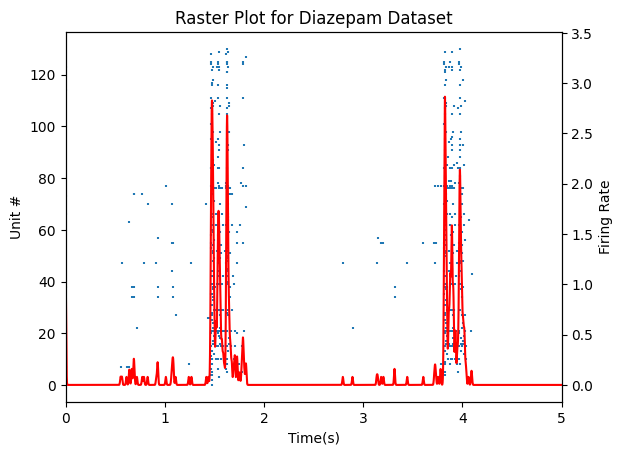

In [15]:
def raster_analysis(sd, dataset, seconds=20):
    # Zoomed Raster and pop rate
    # Get coordinates for raster
    idces, times = sd.idces_times()

    # Get population rate for everything
    pop_rate = sd.binned(bin_size=1)# in ms
    # Lets smooth this to make it neater
    sigma = 5
    pop_rate_smooth = gaussian_filter1d(pop_rate.astype(float),sigma=sigma) 
    t = np.linspace(0,sd.length,pop_rate.shape[0])/1000

    fig, ax = plt.subplots()

    ax.scatter(times/1000,idces,marker='|',s=1)
    ax2 = ax.twinx()
    ax2.plot(t,pop_rate_smooth,c='r')

    ax.set_xlim(0,seconds)
    ax.set_xlabel("Time(s)")
    ax.set_ylabel('Unit #')
    ax2.set_ylabel('Firing Rate')

    plt.title('Raster Plot for {d} Dataset'.format(d=dataset))
    plt.show()

#plotting both datasets
raster_analysis(data_control, 'Control', seconds=7.5)
raster_analysis(data_diazepam, 'Diazepam', seconds=5)

### Replicate Correlation and ISI (1.5 Points) <font color="green"> 

Plot the correlation matrix and the ISI histogram for the diazepam dataset. Briefly compare these plots to those from the control dataset.

<font color="green"><b>Answer

Comparing the correlation matrix of the Diazepam dataset to the control, the heatmap is much lighter green in many areas. This indicates that the neurons are more highly correlated under the affect of Diazepam than without, which is consistent with what we would expect, since Diazepam increases neural organization. Comparing the histograms of both datasets, while the control dataset's histogram visually followes a Poisson Distribution, the Diazepam dataset's histogram is spread much more evenly across the x-axis. This indicates that the Diazepam's dataset may follow a less random distribution, which is also what we would expect the effect of the drug to be. 

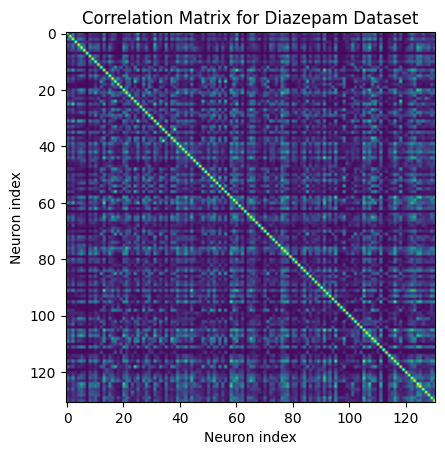

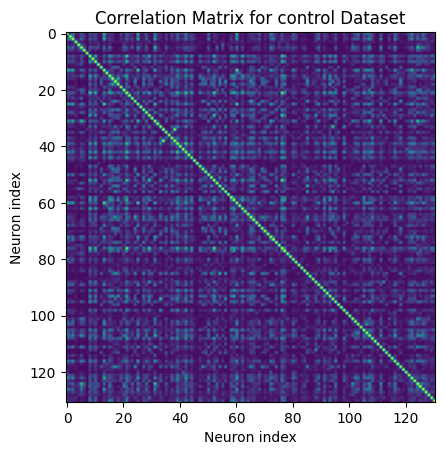

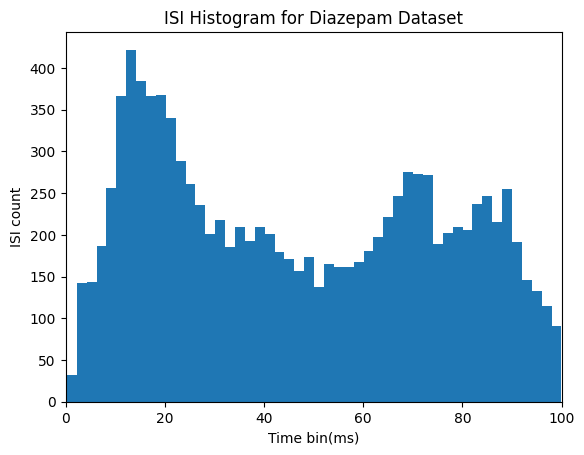

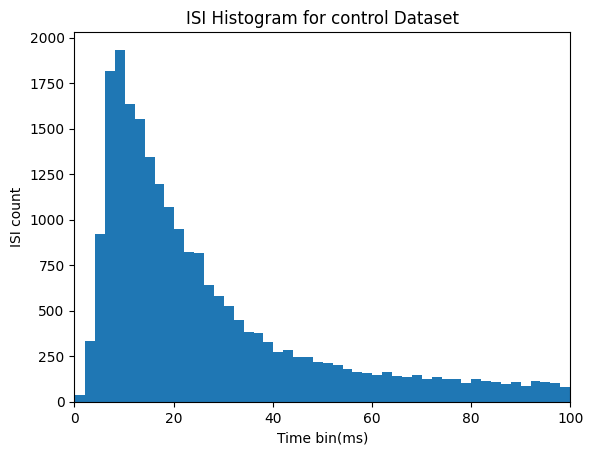

In [16]:
def correlation(sd, dataset):
    # Correlation
    corr = np.zeros((sd.N,sd.N)) #inds by inds

    dense_raster = sd.raster(bin_size=1) # in ms
    sigma = 5                            # Blur it
    dense_raster = gaussian_filter1d(dense_raster.astype(float),sigma=sigma) 
    corr=np.corrcoef( dense_raster )
    
    plt.imshow(corr)
    plt.xlabel("Neuron index")
    plt.ylabel("Neuron index")
    plt.title('Correlation Matrix for {} Dataset'.format(dataset))
    plt.show() 

def interspike(sd, dataset):
    # Interspike-intervals of 2 select neurons
    isis_raw = sd.interspike_intervals()
    # Remove all isi's greater than 100ms. As there are likely neurons not following periodic firing pattern
    isis=[]
    for i in range(len(isis_raw)):   
        isi=isis_raw[i]
        isis = isis + isi[isi<100].tolist() 
        
    # Plot the isi's
    plt.xlim(0,100)
    plt.hist(isis, bins=50)
    plt.xlabel('Time bin(ms)')
    plt.ylabel('ISI count')
    plt.title('ISI Histogram for {d} Dataset'.format(d=dataset))
    plt.show()

#plotting both
correlation(data_diazepam, 'Diazepam')
correlation(data_control, 'control')
interspike(data_diazepam, 'Diazepam')
interspike(data_control,'control')

## Correlation & Spike Time Tilling (9.5 Points)

### Correlation Matrix Equation

Given a matrix $X$, with $n$ random variables as its rows, write down the formula that the correlation matrix

<font color="green"><b>Answer

$\begin{bmatrix}
1 & \rho_{12} & \rho_{13} & \cdots & \rho_{1n} \\
\rho_{21} & 1 & \rho_{23} & \cdots & \rho_{2n} \\
\rho_{31} & \rho_{32} & 1 & \cdots & \rho_{3n} \\
\vdots & \vdots & \vdots & \ddots & \vdots \\
\rho_{n1} & \rho_{n2} & \rho_{n3} & \cdots & 1 \\
\end{bmatrix}$

Where:

$\rho_{jk} = \frac{\sum^n_{i=1} (x_{ij} - \bar{x}_{j})(x_{ik} - \bar{x}_k)}{\sqrt{\sum^n_{i=1} (x_{ij} - \bar{x}_{j})^2}\sqrt{\sum^n_{i=1} (x_{ik} - \bar{x}_{k})^2}}
$

### Diagonal of Correlation Matrix (1 Point)

What are the values on the diagonal of the correlation matrix? Why?

<font color="orange">**Hint:** If you need to, you can check the values of the diagonal in the source code. This is not necessary to receive full credit though.

<font color="green"><b>Answer

The values on the diagonal of the correlation matrix are all 1s. This is because the indices of the rows and columns of a correlation matrix are identical. Therefore, the diagonal will represent the correlation between two identical values, which is 1. 

### Why STTC? (1.5 Points)

Briefly read through the paper on [spike time tilling](./reading_material/Spike_Time_Tiling.pdf). For electrophysiology, what is the advantage of using spike time tiling over correlation?

<font color="green"><b>Answer

The advantage of using the spike time tiling over correlation is that STTC does not have the same spike rate dependency. Because the Pearson correlation, or correlation index, is spike rate dependent, the consequential spike rate will impact the coordination trends found in the matrix. Because the STTC adjusts for the firing rate of neurons, it is therefore a more accurate measure for investigating coordination of neural firing patterns. 

### Plot STTC (2 Points)

Use the braingeneerspy package's [analysis code](https://github.com/braingeneers/braingeneerspy/blob/master/src/braingeneers/analysis/analysis.py) to create a plot of the STTC for both the control dataset and the diazepam dataset. 

<font color="orange"><b>Hint:</b> This is the same package used in the source code to create the other plots. You only need to write 2 lines of code to complete this exercise. In the code, by default `delt=20`, leave it that way.

<font color="green"><b>Answer

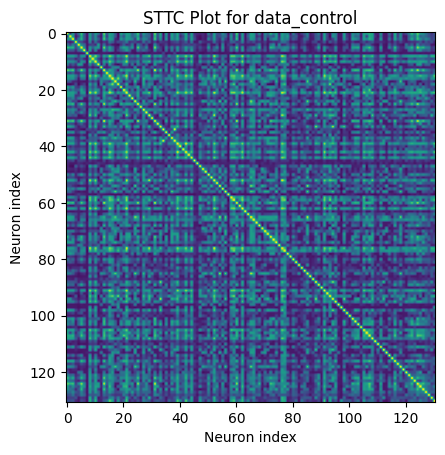

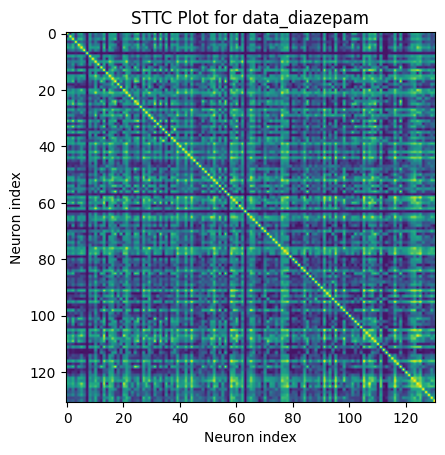

In [17]:
def plotSTTC(inData,dataSet):
    plt.imshow(inData.spike_time_tilings()) #once per dataset
    plt.xlabel("Neuron index")
    plt.ylabel("Neuron index")
    plt.title('STTC Plot for {dataSet}'.format(dataSet=dataSet))
    plt.show() 

#plotting both datasets 
plotSTTC(data_control,'data_control')
plotSTTC(data_diazepam,'data_diazepam')

### Compare Plots (1.5 Points)

Compare the two plots of the STTC. Does the variation between these plots make sense, considering our understanding of diazepam? Explain. Is the comparison between these two plots consistent with the variation you see between the correlation matrices of both datasets?

<font color="green"><b>Answer

The Diazepam dataset is much more highly correlated (lighter colored) than the control dataset. This is consistent with what we would expect from Diazepam, because we know the drug increases the organization and connectivity of neurons, increasing the correlation between neurons, and lightening the plot above. This is also consistent with the correlation matrices of both datasets, as the same trend of increased correlation and connectivity is seen in both (the Diazepam dataset is lighter than the control). 

### Diagonal of STTC (1.5 Points)

What do the diagonal values of the STTC equal. Why is this the case?

<font color="green"><b>Answer

The diagonal values of the STTC also equal 1. This is the case because each point on the plot represents how correlated the spikes are of a neuron with another. Because the diagonal represents the correlation between a neuron and itself, the spike timing will be exactly correlated, and therefore equal to 1.